## Expansiones y Kernels no lineales para regresión

Como motivación, vamos a tratar de ajustar a una regresión lineales con datos que tengan formas bien distintas a una línea. 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import  linear_model

Primero, datos que sean bien lineales. 

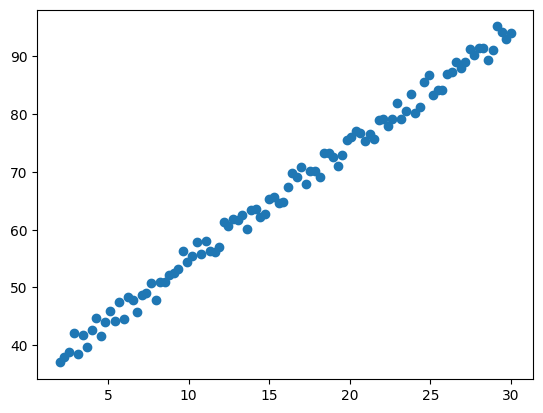

In [8]:
x_train=np.linspace(2,30,100)
y_train= 2*(x+15)+np.random.random_sample(x_train.shape)*5+2
plt.scatter(x_train, y_train)
plt.show()

Ahora algunos datos mas difíciles! 

In [82]:
#### Vamos a usar esta función para ahorrar codigo. 
#### el input son puntos 2D para poner en un plano, 
### luego algunos puntos para testear, que van a una línea
def plot_model(dots_x,dots_y,test_data, clf):
    y_test = clf.predict(test_data)
    plt.scatter(x_train, y_train)
    plt.plot(x_test, y_test)

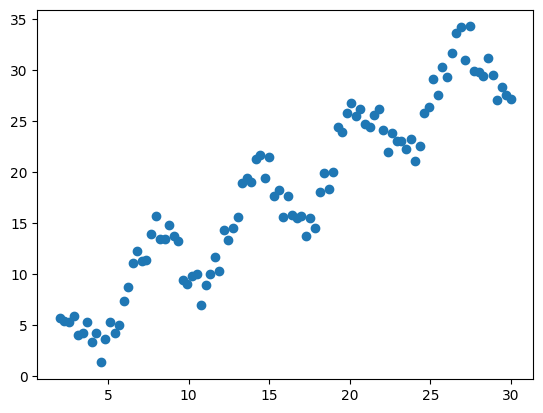

In [83]:
x_train=np.linspace(2,30,100)
y_train= np.sin(x_train[:])+1
y_train= x_train[:] + 4*np.sin(x_train[:])+ 4*np.random.rand(x_train.shape[0])
plt.scatter(x_train, y_train)
plt.show()

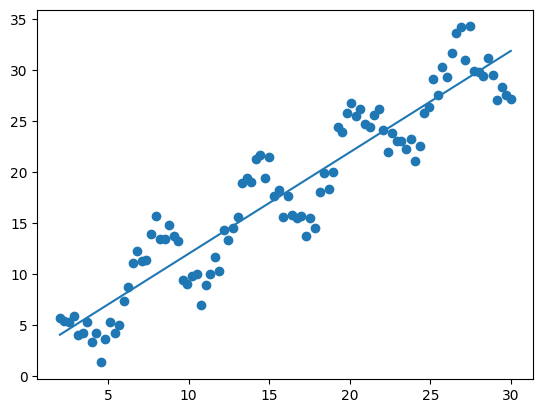

In [84]:
regr = linear_model.LinearRegression()
x_train = x_train.reshape(-1, 1)
regr.fit(x_train,y_train)

### en x_test volvemos a seleccionar puntos entre 2 y 30, esto quedara claro después. 
x_test=np.linspace(2,30,100)
x_test  = x_test.reshape(-1, 1)
plot_model(x_train,y_train,x_test, regr)



### Métodos de Kernel

Vamos a partir definiendo un Kernel lineal, que tome el producto punto nada más. 

In [25]:
def linear_kernel(X, Z):
    '''
    Producto punto entre filas de X y filas de Z
    '''
    m1,_ = X.shape
    m2,_ = Z.shape
    K = np.zeros((m1, m2))
    for i in range(m1):
        for j in range(m2):
            K[i,j] = np.dot(X[i,:], Z[j,:])

    return K

Ahora, para usar este kernel en la regresión, transformamos los datos según el Kernel. 
Para los datos de entrenamiento, multiplicamos cada fila de x_train por cada fila de x_train. 
Para los datos de test, multiplicamos cada fila de x_test por cada fila de x_train. 

Luego podemos hacer regresión con ese kernel. 

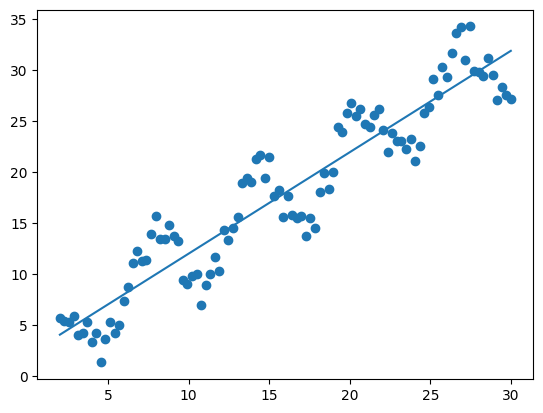

In [87]:
K_train = linear_kernel(x_train, x_train) 
K_test  = linear_kernel(x_test,  x_train)

lk_reg = linear_model.LinearRegression()
lk_reg.fit(K_train, y_train)
plot_model(x_train, y_train,K_test, lk_reg)

Probamos otros kernells, primero polinomiales y luego un kernel gaussiano. 

In [88]:
def polynomial_kernel(X, Z, d):
    m1,_ = X.shape
    m2,_ = Z.shape
    K = np.zeros((m1, m2))
    for i in range(m1):
        for j in range(m2):
            K[i,j] = (np.dot(X[i,:], Z[j,:]) + 1)**d
            
    return K

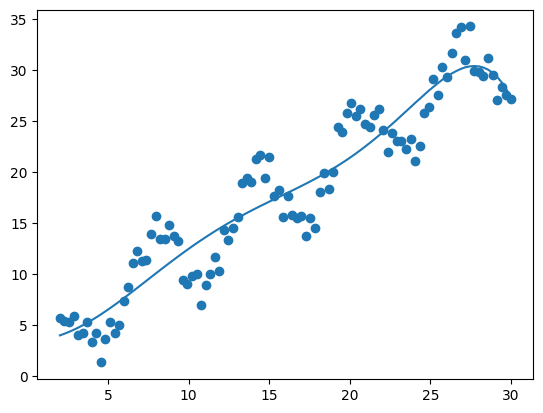

In [89]:
K_train = polynomial_kernel(x_train, x_train,6) 
K_test  = polynomial_kernel(x_test,  x_train,6)

lk_reg = linear_model.LinearRegression()
lk_reg.fit(K_train, y_train)
plot_model(x_train, y_train,K_test, lk_reg)

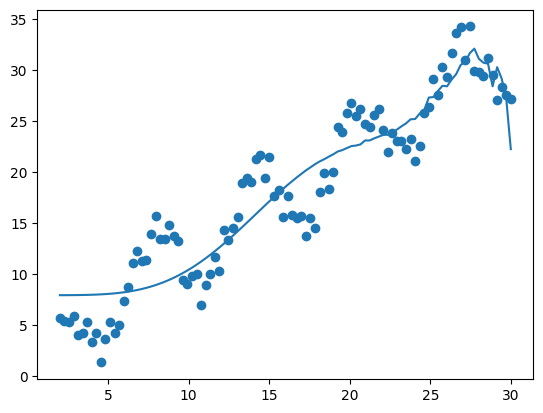

In [90]:
K_train = polynomial_kernel(x_train, x_train,9) 
K_test  = polynomial_kernel(x_test,  x_train,9)

lk_reg = linear_model.LinearRegression()
lk_reg.fit(K_train, y_train)
plot_model(x_train, y_train,K_test, lk_reg)

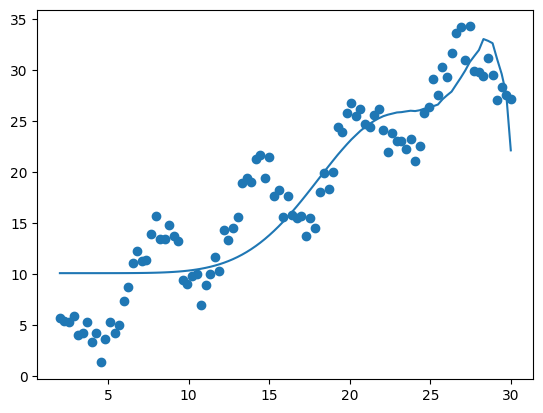

In [91]:
K_train = polynomial_kernel(x_train, x_train,12) 
K_test  = polynomial_kernel(x_test,  x_train,12)

lk_reg = linear_model.LinearRegression()
lk_reg.fit(K_train, y_train)
plot_model(x_train, y_train,K_test, lk_reg)

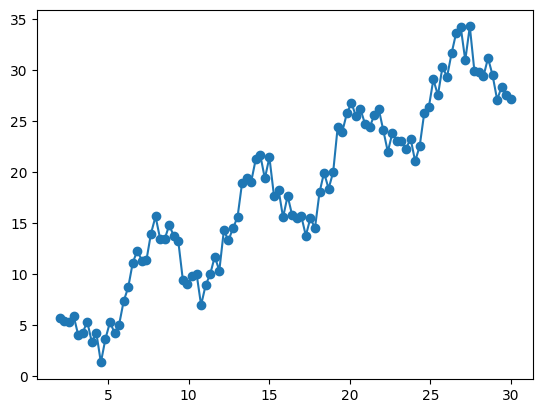

In [94]:
### Para esto vamos a escalar con un factor de 0.5. 
def gauss(x_i,x_j):
    return np.exp(-0.5*np.linalg.norm(x_i-x_j))

def gaussian_kernel(X, Z):
    m1,_ = X.shape
    m2,_ = Z.shape
    K = np.zeros((m1, m2))
    for i in range(m1):
        for j in range(m2):
            K[i,j] = gauss(X[i,:], Z[j,:])
            
    return K
    
K_train = gaussian_kernel(x_train, x_train)
K_test  = gaussian_kernel(x_test,  x_train)

lk_reg = linear_model.LinearRegression()
lk_reg.fit(K_train, y_train)
plot_model(x_train, y_train,K_test, lk_reg)

Y no podíamos terminar de otra forma: con Helados! 

Para mostrar como aplicar este truco a una regresión logística, volvemos al dataset que usamos al principio del semestre. 

In [95]:
import pandas as pd
helados = pd.read_csv('Ice_cream.csv')
helados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  200 non-null    int64
 1   id          200 non-null    int64
 2   female      200 non-null    int64
 3   ice_cream   200 non-null    int64
 4   video       200 non-null    int64
 5   puzzle      200 non-null    int64
dtypes: int64(6)
memory usage: 9.5 KB


In [96]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(helados[['video','puzzle']], helados['ice_cream'])

log_reg.coef_

array([[ 0.0003821 , -0.00636681]])

/Users/juan/downloads/ENTER/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/juan/downloads/ENTER/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


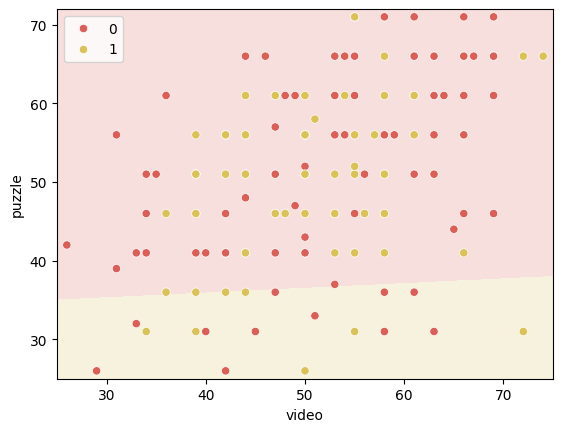

In [97]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sns

# Tomamos una paleta de 8 colores
palette = sns.color_palette("hls", 8)


# Pasamos la paleta a Hexadecimal
# Para el fondo necesitamos que sea un Colormap
palete_hex = palette.as_hex()
palette_back = ListedColormap(palete_hex[0:2])

# Límites del gráfico
# Buscamos los límites del gráfico
x_min, x_max = helados.video.min() - 1, helados.video.max() + 1
y_min, y_max = helados.puzzle.min() - 1, helados.puzzle.max() + 1

# Generamos las combinaciones de x/y del plano en los rangos
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Generamos las predicciones
predictions = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])

# Resultado de la frontera de decisión con color claro
Z = predictions.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=palette_back, shading='auto', alpha=0.2)
plt.xlabel('video')
plt.ylabel('puzzle')

sns.scatterplot(data=helados, x="video", y="puzzle", hue="ice_cream", palette=palette[0:2])

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.legend()

plt.show()

In [65]:
K_train = gaussian_kernel(helados[['video','puzzle']].to_numpy(), helados[['video','puzzle']].to_numpy())

log_reg = LogisticRegression()
log_reg.fit(K_train, helados['ice_cream'].to_numpy())

log_reg.coef_


array([[-2.27553110e-01,  3.17693939e-01, -2.62293197e-01,
        -4.43818910e-01,  1.76252564e-01,  3.17693939e-01,
         1.76252564e-01,  5.28559849e-01,  5.19166117e-01,
         1.11355677e-01,  1.76252564e-01,  3.17693939e-01,
        -3.69593405e-01, -2.92093454e-01, -3.22220214e-01,
         3.42960642e-04,  3.42960642e-04, -6.60161281e-02,
        -8.58617818e-02,  5.10671056e-01,  4.43076588e-01,
         5.59198470e-01,  2.19953156e-01, -1.77735887e-01,
         2.45549206e-01,  3.28793977e-01, -3.91256988e-01,
         6.06648979e-01,  2.45549206e-01,  1.70071044e-01,
         1.66744485e-01, -1.60755563e-01, -3.54113353e-01,
         5.01675503e-01, -1.77735887e-01, -3.91256988e-01,
         6.50480562e-02,  6.50480562e-02,  1.38397714e-01,
         1.61111560e-01,  3.98571270e-01,  5.19166117e-01,
         3.62928425e-01, -1.02605774e-01, -7.03558120e-02,
        -3.43304278e-01, -8.77892565e-02,  7.49880398e-02,
         5.10671056e-01,  1.66744485e-01,  3.21301658e-0

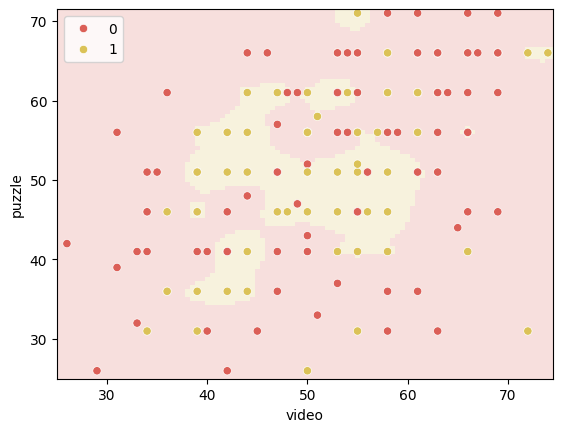

In [71]:
palete_hex = palette.as_hex()
palette_back = ListedColormap(palete_hex[0:2])

# Límites del gráfico
# Buscamos los límites del gráfico
x_min, x_max = helados.video.min() - 1, helados.video.max() + 1
y_min, y_max = helados.puzzle.min() - 1, helados.puzzle.max() + 1

# Generamos las combinaciones de x/y del plano en los rangos
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5),
                     np.arange(y_min, y_max, 0.5))

# Generamos las predicciones
K_test = gaussian_kernel(np.c_[xx.ravel(), yy.ravel()],helados[['video','puzzle']].to_numpy())
predictions = log_reg.predict(K_test)

# Resultado de la frontera de decisión con color claro
Z = predictions.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=palette_back, shading='auto', alpha=0.2)
plt.xlabel('video')
plt.ylabel('puzzle')

sns.scatterplot(data=helados, x="video", y="puzzle", hue="ice_cream", palette=palette[0:2])

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.legend()

plt.show()

In [74]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

predictions = log_reg.predict(K_train)

print(precision_score(predictions, helados['ice_cream'].to_numpy()))
print(recall_score(predictions, helados['ice_cream'].to_numpy()))
print(accuracy_score(predictions, helados['ice_cream'].to_numpy()))

0.7263157894736842
0.7582417582417582
0.76
